# Regression

* In this notebook we are going to use a very simple dataset and avoid the EDA (Exploratory Data Analysis) part wherever it is possible. 
* We will focus on introducing the main Machine Learning models and then suggest how they can be tuned in order to improve their performance.
* Finally, the main evaluation metrics are introduced.
* The code structure is as simple as possible, the processes are repeated many times due to pedagogical reasons, of course it can be supressed with the use of custom functions.

#### Import libraries, load data, basic data analysis, prepare data for the ML models

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [24]:
#load dataset
df = pd.DataFrame(pd.read_csv('mpg.csv'))
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [25]:
#show basic statistics of data
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


Above we can only see the numerical features

In [26]:
#create a list with the names of the features that you are going to use as independent variables
feature_cols = ['cylinders', 'horsepower', 'displacement', 'weight', 'acceleration', 'model_year', 'origin', 'name']

#Create the feature and target vectors
X = df[feature_cols]
y = df.mpg                           # The task is to predict the value of  mpg of a car given the features that are set in the X vector

In [27]:
X.head()

,cylinders,horsepower,displacement,weight,acceleration,model_year,origin,name
0,8,130,307.0,3504,12.0,70,1,chevrolet chevelle malibu
1,8,165,350.0,3693,11.5,70,1,buick skylark 320
2,8,150,318.0,3436,11.0,70,1,plymouth satellite
3,8,150,304.0,3433,12.0,70,1,amc rebel sst
4,8,140,302.0,3449,10.5,70,1,ford torino


### Split each vector X, y into training and testing data sets

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle= True, random_state=42)

### Linear regression

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
# Create linear regression object
regr = LinearRegression()
# Train the model using the training sets
regr.fit(X_train, y_train);

ValueError: could not convert string to float: '?'

There is an **Error** ! It can not convert **strings** to **float** '?'

1. Prepare our data accordingly for the Machine learning model
    
    * All features must be numerical
    * Why is there a symbol of '?' in a feature?

2. Which are the non-numerical features ?
    * convert them into numerical or exclude them if it is not possible

In [31]:
# Show the data types of the features
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   horsepower    398 non-null    object 
 2   displacement  398 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   name          398 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 25.0+ KB


I will do the research on the initial dataframe -> **df**

In [32]:
#Let start from the first non-numerical feature - horsepower, are there '?' values?
(df.horsepower=='?').sum()

np.int64(6)

In [33]:
df.horsepower.value_counts()

horsepower
150    22
90     20
88     19
110    18
100    17
       ..
61      1
93      1
148     1
152     1
82      1
Name: count, Length: 94, dtype: int64

In [34]:
#replace the '?' with the most frequent value for horsepower
df.horsepower = df.horsepower.apply(lambda x : x.replace('?', '150'))

In [35]:
#check if they changed
(df.horsepower=='?').sum()

np.int64(0)

In [36]:
#Let's convert it to numerical now
df.horsepower = df.horsepower.astype('int64')

In [37]:
#Now move to the second non-numerical feature - name
(df.name=='?').sum()

np.int64(0)

In [38]:
#How are we going to manage this feature
df.name.value_counts()

name
ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: count, Length: 305, dtype: int64

In [39]:
#Update the feature columns that we will use 
df = df.drop(columns=['name'])
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


3. Are all features in the appropriate form ?

In [40]:
df.origin.value_counts()

origin
1    249
3     79
2     70
Name: count, dtype: int64

4. This transformation of origin to numbers indicates an order, is that right? Is the car's origin from America > origin from Europe?  

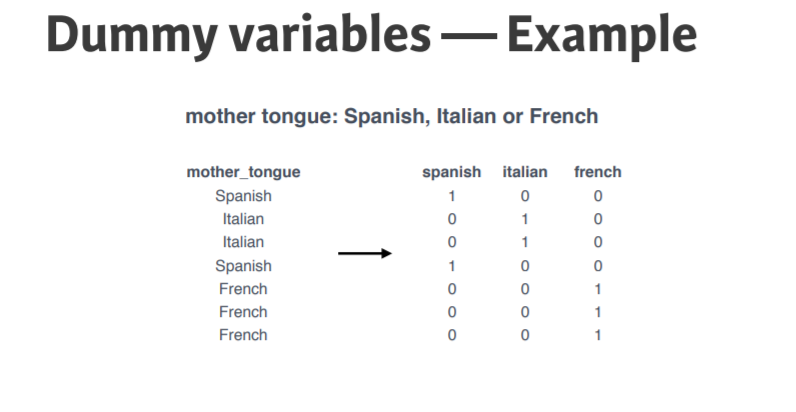

In [41]:
# Transform the feature of origin
dummies = pd.get_dummies(df.origin, prefix='origin')
dummies

,origin_1,origin_2,origin_3
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
393,True,False,False
394,False,True,False
395,True,False,False
396,True,False,False


In [42]:
#Insert the new features that we created above for the origin feature
df = pd.concat([df, dummies], axis=1)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,origin_1,origin_2,origin_3
0,18.0,8,307.0,130,3504,12.0,70,1,True,False,False
1,15.0,8,350.0,165,3693,11.5,70,1,True,False,False
2,18.0,8,318.0,150,3436,11.0,70,1,True,False,False
3,16.0,8,304.0,150,3433,12.0,70,1,True,False,False
4,17.0,8,302.0,140,3449,10.5,70,1,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,True,False,False
394,44.0,4,97.0,52,2130,24.6,82,2,False,True,False
395,32.0,4,135.0,84,2295,11.6,82,1,True,False,False
396,28.0,4,120.0,79,2625,18.6,82,1,True,False,False


In [43]:
#don't forget to drop the original 'origin' feature
df = df.drop(columns=['origin'])
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130,3504,12.0,70,True,False,False
1,15.0,8,350.0,165,3693,11.5,70,True,False,False
2,18.0,8,318.0,150,3436,11.0,70,True,False,False
3,16.0,8,304.0,150,3433,12.0,70,True,False,False
4,17.0,8,302.0,140,3449,10.5,70,True,False,False
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,True,False,False
394,44.0,4,97.0,52,2130,24.6,82,False,True,False
395,32.0,4,135.0,84,2295,11.6,82,True,False,False
396,28.0,4,120.0,79,2625,18.6,82,True,False,False


In [44]:
#Ensure that we have the right features in the right form after the transformations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin_1      398 non-null    bool   
 8   origin_2      398 non-null    bool   
 9   origin_3      398 non-null    bool   
dtypes: bool(3), float64(3), int64(4)
memory usage: 23.1 KB


In [45]:
#Create the feature and target vectors from the TRANSFORMED dataframe
X = df.iloc[:, 1:]
y = df.mpg      # miles per gallon

In [46]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_1,origin_2,origin_3
0,8,307.0,130,3504,12.0,70,True,False,False
1,8,350.0,165,3693,11.5,70,True,False,False
2,8,318.0,150,3436,11.0,70,True,False,False
3,8,304.0,150,3433,12.0,70,True,False,False
4,8,302.0,140,3449,10.5,70,True,False,False


Now we can proceed with the training part

# Train - Predict - Evaluate Machine learning models

### 1. Linear Regression

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [48]:
# Create linear regression object
regr = LinearRegression()
# Train the model using the training sets
regr.fit(X_train, y_train)
# Make predictions using the testing set
y_pred_lr = regr.predict(X_test)

np.ravel() -> https://numpy.org/doc/stable/reference/generated/numpy.ravel.html

In [49]:
# I am flattening the vectors to create the dataframe below
y_test=np.ravel(y_test)
y_pred_lr = np.ravel(y_pred_lr)

In [50]:
#Calculate the arrays that we will use in the dataframe
absolute_error = abs(y_test-y_pred_lr)
squared_error =  (y_test-y_pred_lr)**2
error =  y_test-y_pred_lr

In [51]:
df_test_target = pd.DataFrame(data={'true value' : y_test , 'predicted value' : y_pred_lr, 'difference' : error,
                                    'absolute_error' : absolute_error, 'squared_error' :  squared_error})
df_test_target

,true value,predicted value,difference,absolute_error,squared_error
0,33.0,32.398300,0.601700,0.601700,0.362043
1,28.0,29.299155,-1.299155,1.299155,1.687803
2,19.0,21.156167,-2.156167,2.156167,4.649054
3,13.0,16.866464,-3.866464,3.866464,14.949547
4,14.0,12.359690,1.640310,1.640310,2.690617
...,...,...,...,...,...
75,19.9,22.118657,-2.218657,2.218657,4.922441
76,17.5,20.374742,-2.874742,2.874742,8.264139
77,28.0,29.318993,-1.318993,1.318993,1.739742
78,29.0,30.381155,-1.381155,1.381155,1.907589


In [52]:
# The mean squared error
lr_RMSE = sqrt(mean_squared_error(y_test, y_pred_lr))
print('Root Mean squared error: ', lr_RMSE)

# The coefficient of determination: 1 is perfect prediction
lr_r2 = r2_score(y_test, y_pred_lr)
print('Coefficient of determination: ', lr_r2)

Root Mean squared error:  2.889297939047904
Coefficient of determination:  0.84473508012911


### 2. SVR

In [53]:
from sklearn import svm

In [54]:
#Create svr object
svr = svm.SVR(kernel='linear')
#Train the model using the training set
svr.fit(X_train, y_train)
# Make predictions using the testing set
y_pred_svr = svr.predict(X_test)

In [55]:
# The mean squared error
svr_RMSE = sqrt(mean_squared_error(y_test, y_pred_svr))
print('Root Mean squared error: ', svr_RMSE)

# The coefficient of determination: 1 is perfect prediction
svr_r2 = r2_score(y_test, y_pred_svr)
print('Coefficient of determination: ', svr_r2)

Root Mean squared error:  4.782551297320438
Coefficient of determination:  0.5745897382044836


Examples of SVR using different kernels -> https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-auto-examples-svm-plot-svm-regression-py

### 3. KNeighborsRegressor

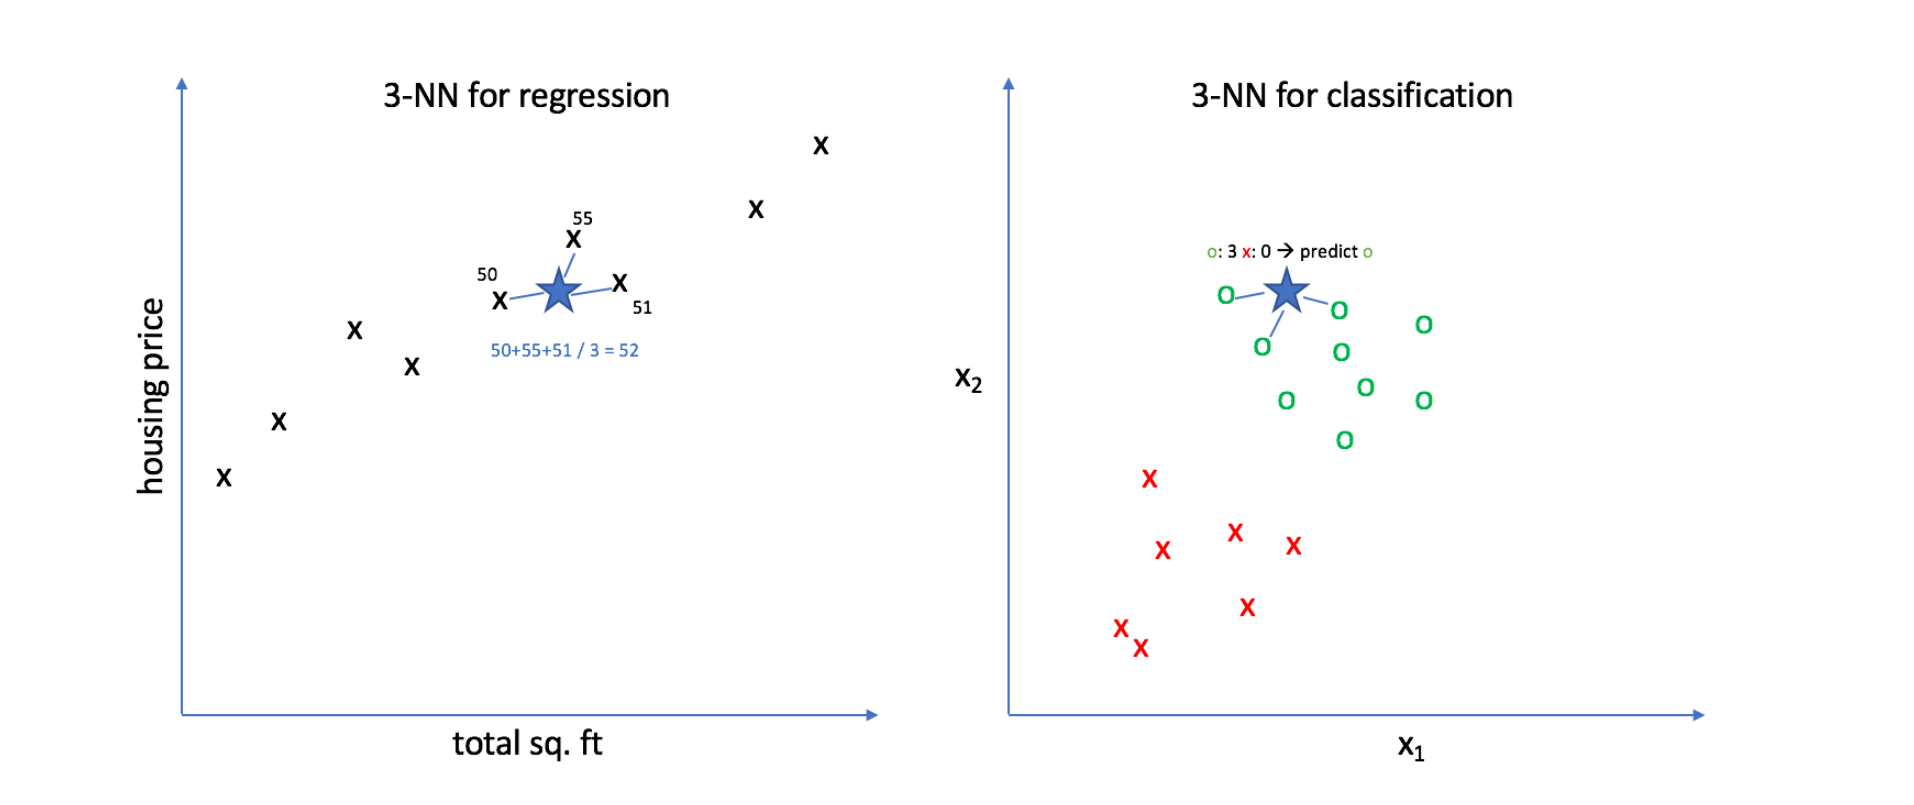
https://www.jeremyjordan.me/k-nearest-neighbors/

In [56]:
from sklearn.neighbors import KNeighborsRegressor

In [57]:
# Create k neighbors regression object
knr = KNeighborsRegressor(n_neighbors=2)
#Train the model using the training set
knr.fit(X_train, y_train);

In [58]:
# Make predictions using the testing set
y_pred_knr = knr.predict(X_test)

In [59]:
# The mean squared error
knr_RMSE = sqrt(mean_squared_error(y_test, y_pred_knr))
print('Root Mean squared error: ', knr_RMSE)

# The coefficient of determination: 1 is perfect prediction
knr_r2 = r2_score(y_test, y_pred_knr)
print('Coefficient of determination: ', knr_r2)

Root Mean squared error:  3.9780020110603265
Coefficient of determination:  0.7056807388344334


KNRegressor https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor

7. Experiment with different number of neighbors

### 4. Decision Tree Regressor

In [60]:
from sklearn import tree

In [61]:
# Create decision tree regression object
dtr = tree.DecisionTreeRegressor()
# Train the model using the training set
dtr = dtr.fit(X_train, y_train)

<function matplotlib.pyplot.show(close=None, block=None)>

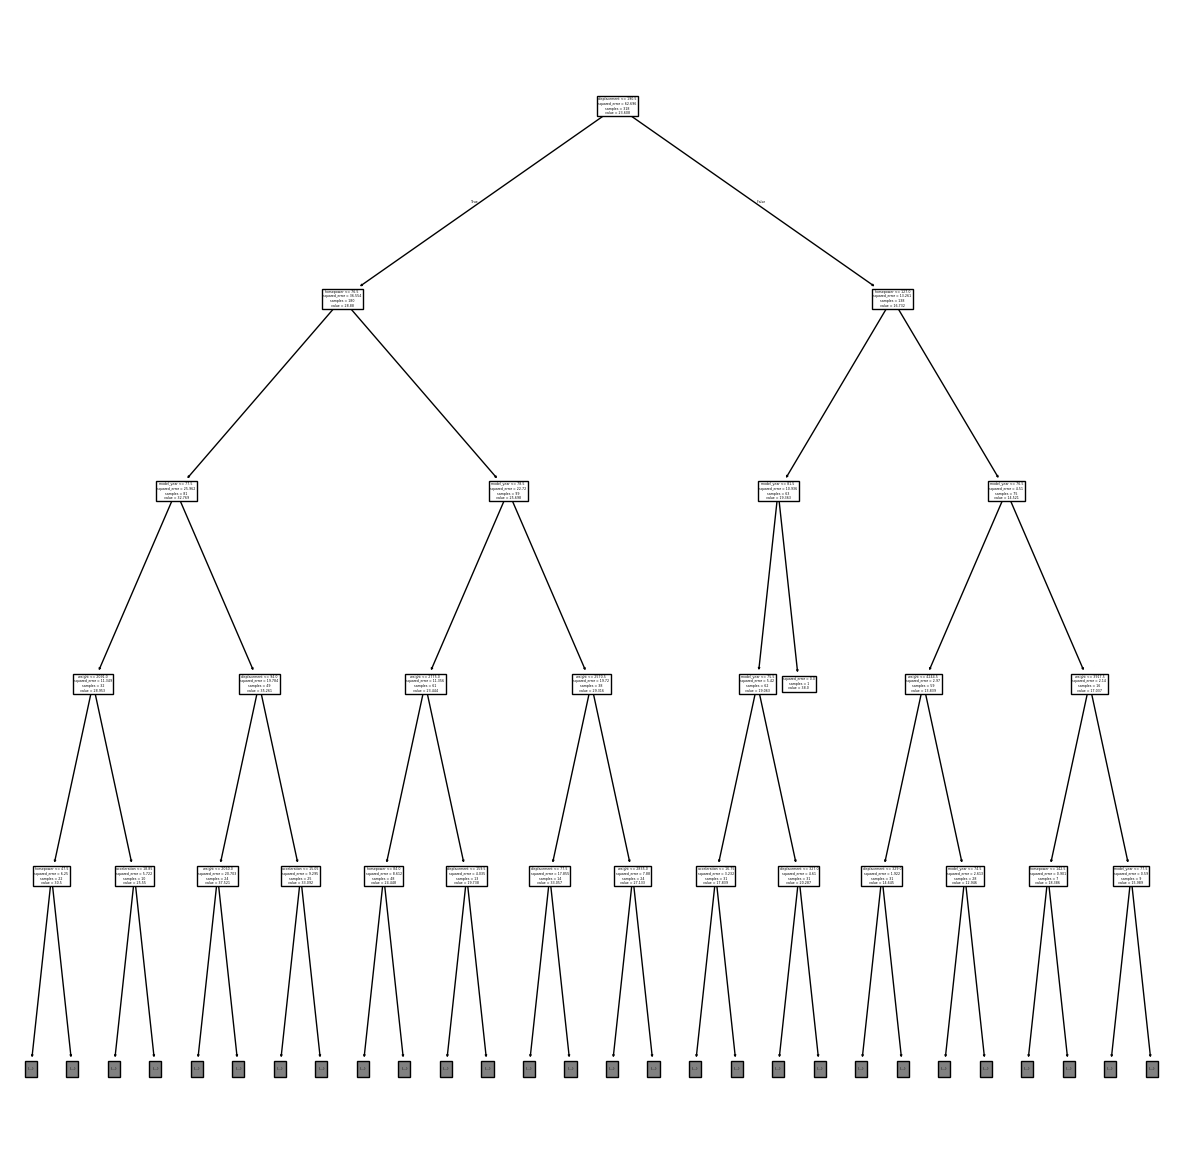

In [62]:
#Plot the decision tree = trained model
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(dtr, feature_names=X.columns, max_depth=4)
plt.show

In [63]:
# Make predictions using the testing set
y_pred_dtr = dtr.predict(X_test);

In [64]:
# The mean squared error
dtr_RMSE = sqrt(mean_squared_error(y_test, y_pred_dtr))
print('Root Mean squared error: ', dtr_RMSE)

# The coefficient of determination: 1 is perfect prediction
dtr_r2 = r2_score(y_test, y_pred_dtr)
print('Coefficient of determination: ', dtr_r2)

Root Mean squared error:  3.470050431910176
Coefficient of determination:  0.7760452587121313


### Evaluation Summary

In [65]:
df_evaluation = pd.DataFrame(data={'R^2': [lr_r2, svr_r2 , knr_r2, dtr_r2 ],
                                   'RMSE': [lr_RMSE , svr_RMSE , knr_RMSE, dtr_RMSE]}, 
                             index=['lr', 'svr', 'knr', 'dtr'])
df_evaluation

,R^2,RMSE
lr,0.844735,2.889298
svr,0.574590,4.782551
knr,0.705681,3.978002
dtr,0.776045,3.470050


10. Which is the best model ?

**The best model is the one that has the lowest RMSE and the highest R^2**

11. Normalise the data before using them to train the models and observe if there is any regressor that is affected from it.

https://medium.com/@rahul77349/feature-scaling-why-it-is-required-8a93df1af310